In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r'C:\Users\Dhruv Kumar Jha\Downloads\StockData.csv')
data

,DATE,INDIGO,ICICI,Jet_Airways,SBI,TATA Chem,TATA Comm
0,01-01-2019,1165.599976,363.750000,280.799988,299.600006,705.299988,522.250000
1,02-01-2019,1161.000000,364.600006,263.549988,293.899994,700.849976,521.349976
2,03-01-2019,1156.550049,363.250000,247.199997,291.100006,694.450012,536.000000
3,04-01-2019,1143.199951,365.200012,245.199997,297.649994,698.450012,531.450012
4,07-01-2019,1113.750000,367.700012,246.199997,296.299988,699.900024,528.849976
...,...,...,...,...,...,...,...
236,23-12-2019,1300.349976,541.299988,25.250000,332.399994,667.900024,386.250000
237,24-12-2019,1306.949951,541.099976,26.500000,331.450012,682.799988,395.549988
238,26-12-2019,1321.949951,538.750000,27.799999,329.850006,668.599976,391.000000
239,27-12-2019,1340.050049,549.400024,29.150000,337.250000,667.500000,391.200012


In [4]:
data.drop(['DATE'], axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDIGO       241 non-null    float64
 1   ICICI        241 non-null    float64
 2   Jet_Airways  241 non-null    float64
 3   SBI          241 non-null    float64
 4   TATA Chem    241 non-null    float64
 5   TATA Comm    241 non-null    float64
dtypes: float64(6)
memory usage: 11.4 KB


In [6]:
# Percentage daily return
pct = data.pct_change()
pct.head()

,INDIGO,ICICI,Jet_Airways,SBI,TATA Chem,TATA Comm
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.003946,0.002337,-0.061432,-0.019025,-0.006309,-0.001723
2,-0.003833,-0.003703,-0.062038,-0.009527,-0.009132,0.028100
3,-0.011543,0.005368,-0.008091,0.022501,0.005760,-0.008489
4,-0.025761,0.006846,0.004078,-0.004536,0.002076,-0.004892


### Calculating the covariance matrix for the stocks :

In [7]:
cov_matrix = pct.cov()
cov_matrix

,INDIGO,ICICI,Jet_Airways,SBI,TATA Chem,TATA Comm
INDIGO,0.000617,0.000057,-0.000147,0.000048,0.000011,0.000059
ICICI,0.000057,0.000322,0.000160,0.000241,0.000102,0.000100
Jet_Airways,-0.000147,0.000160,0.006872,0.000208,0.000177,-0.000058
SBI,0.000048,0.000241,0.000208,0.000480,0.000122,0.000158
TATA Chem,0.000011,0.000102,0.000177,0.000122,0.000252,0.000097
TATA Comm,0.000059,0.000100,-0.000058,0.000158,0.000097,0.000993


### Mean return:

In [8]:
pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDIGO       240 non-null    float64
 1   ICICI        240 non-null    float64
 2   Jet_Airways  240 non-null    float64
 3   SBI          240 non-null    float64
 4   TATA Chem    240 non-null    float64
 5   TATA Comm    240 non-null    float64
dtypes: float64(6)
memory usage: 11.4 KB


In [9]:
ind_er = pct.mean()*240
ind_er

INDIGO         0.216268
ICICI          0.440757
Jet_Airways   -1.585271
SBI            0.166892
TATA Chem     -0.028061
TATA Comm     -0.166241
dtype: float64

### Portfolio return:

In [10]:
w = [0.1, 0.2, 0.3, 0.2, 0.1, 0.1] #Taking any random weight
port_er = (w*ind_er).sum()
port_er

-0.35185491101578076

### Volatility :

In [11]:
# Volatility is given by the annual standard deviation.
ann_sd = pct.std().apply(lambda x: x*np.sqrt(240))
ann_sd

INDIGO         0.384953
ICICI          0.277820
Jet_Airways    1.284217
SBI            0.339468
TATA Chem      0.246118
TATA Comm      0.488268
dtype: float64

In [12]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
INDIGO,0.216268,0.384953
ICICI,0.440757,0.277820
Jet_Airways,-1.585271,1.284217
SBI,0.166892,0.339468
TATA Chem,-0.028061,0.246118
TATA Comm,-0.166241,0.488268


### Plotting returns vs volatility for 1000 different portfolios with random weights:

In [13]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = 6
num_portfolios = 1000
rf = 0.04 # risk factor = 4%

In [14]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its weights. 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()  # Portfolio Variance
    sd = np.sqrt(var)                                                       # Daily standard deviation
    ann_sd = sd*np.sqrt(240)                                                # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    ratio = np.subtract(p_ret,rf)
    sharpe_ratio = np.divide(ratio, p_vol)

In [15]:
d = {'Returns':p_ret, 'Volatility':p_vol, 'Sharpe Ratio':sharpe_ratio }

for counter, symbol in enumerate(pct.columns.tolist()):
    #print(counter, symbol)
    d[symbol+' weight'] = [w[counter] for w in p_weights]

In [16]:
portfolios  = pd.DataFrame(d)
portfolios # Dataframe of the 1000 portfolios created

,Returns,Volatility,Sharpe Ratio,INDIGO weight,ICICI weight,Jet_Airways weight,SBI weight,TATA Chem weight,TATA Comm weight
0,-0.607864,0.546290,-1.185935,0.056361,0.004948,0.400755,0.147044,0.387269,0.003623
1,-0.315644,0.383045,-0.928466,0.066947,0.123169,0.257586,0.243751,0.250013,0.058534
2,-0.225441,0.348792,-0.761028,0.120660,0.244837,0.231777,0.133085,0.221415,0.048225
3,0.085359,0.243450,0.186319,0.144543,0.264063,0.031931,0.233676,0.025271,0.300516
4,0.001080,0.249255,-0.156145,0.353811,0.095129,0.057409,0.152351,0.035852,0.305448
...,...,...,...,...,...,...,...,...,...
995,0.028302,0.210599,-0.055545,0.315031,0.122806,0.065672,0.146378,0.317891,0.032222
996,0.150130,0.205887,0.534906,0.185953,0.311429,0.018206,0.173149,0.176287,0.134976
997,0.010715,0.252289,-0.116078,0.073750,0.226705,0.062874,0.270791,0.073439,0.292441
998,-0.174027,0.281990,-0.758988,0.139878,0.126760,0.162596,0.182926,0.228366,0.159473


### Returns vs Volatility plot:

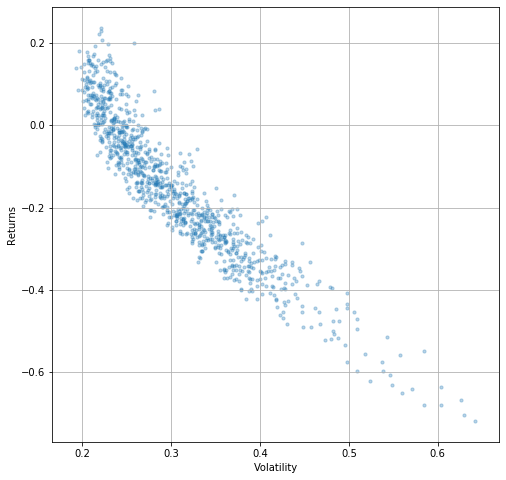

In [17]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[8,8])

### Minimum volatility (left most point):

In [18]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns               0.138032
Volatility            0.192739
Sharpe Ratio          0.508627
INDIGO weight         0.156956
ICICI weight          0.309768
Jet_Airways weight    0.014214
SBI weight            0.051773
TATA Chem weight      0.427928
TATA Comm weight      0.039361
Name: 914, dtype: float64

Text(0, 0.5, 'Returns')

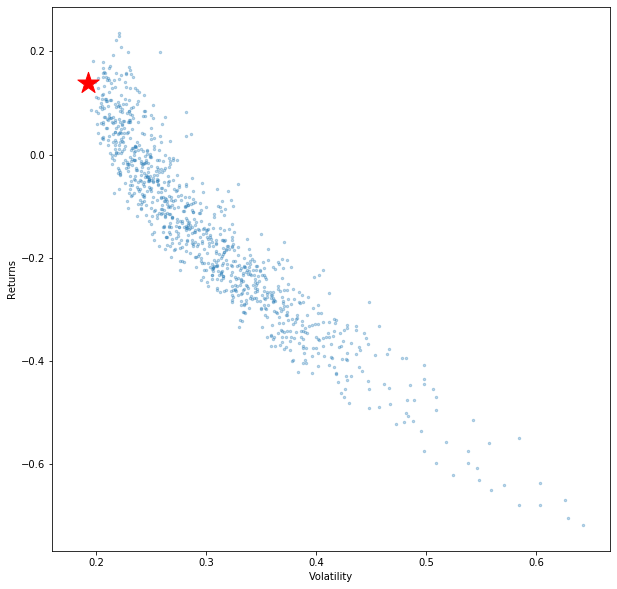

In [19]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=6, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

## Optimal Risky Portfolio

In [20]:
# Finding the optimal portfolio
optimal_risky_port = portfolios.iloc[portfolios['Sharpe Ratio'].idxmax()]
optimal_risky_port

Returns               0.235565
Volatility            0.221026
Sharpe Ratio          0.884805
INDIGO weight         0.248507
ICICI weight          0.390132
Jet_Airways weight    0.017857
SBI weight            0.252762
TATA Chem weight      0.080164
TATA Comm weight      0.010579
Name: 978, dtype: float64

### Plotting optimal portfolio:

Text(0, 0.5, 'Returns')

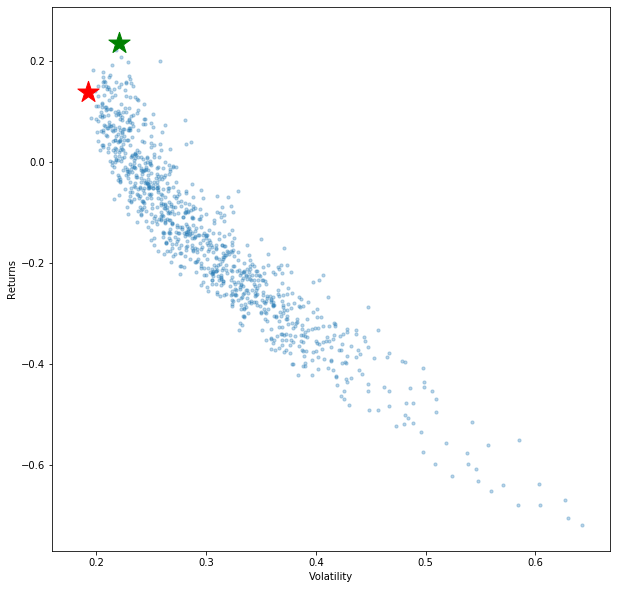

In [21]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

###  VAR by Monte Carlo simulation:

In [22]:
ex_rtn = optimal_risky_port[0]
varsigma = optimal_risky_port[1]

#### Range of returns in a year

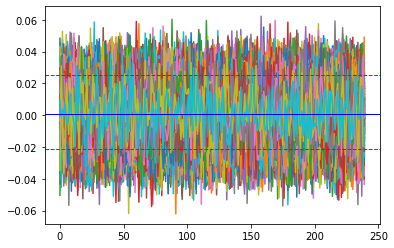

In [23]:
from scipy.stats import norm
import math
Time = 240 #number of working days in my dataset
lt_price=[]
final_res=[]
for i in range(1000): #1000 runs of simulation
  returns =                     (np.random.normal(ex_rtn/Time,varsigma/math.sqrt(Time),Time))
  plt.plot(returns)
plt.axhline(np.percentile(returns,5), color='r', linestyle='dashed', linewidth=1)
plt.axhline(np.percentile(returns,95), color='g', linestyle='dashed', linewidth=1)
plt.axhline(np.mean(returns), color='b', linestyle='solid', linewidth=1)
plt.show()

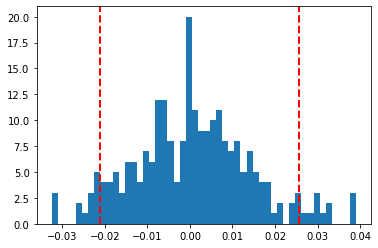

In [24]:
plt.hist(returns,bins=50)
plt.axvline(np.percentile(returns,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(returns,95), color='r', linestyle='dashed', linewidth=2)
plt.show()

In [26]:
#VaR
print(np.percentile(returns,5))
print(np.percentile(returns,95))
pvalue = 1000 #portfolio value
print('Amount required to cover minimum losses for one year is ' + str(pvalue* - np.percentile(returns,5)))

-0.02108642534866632
0.02553225046395358
Amount required to cover minimum losses for one year is 21.08642534866632
